# Rain in Australia Project

## Group Member: Linxin(Iris) Liu， Mingjun Wang

Link for the data: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

This dataset contains about 10 years of daily weather observations from many locations across Australia.
RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.


## Goal and Focus 

This rain in Australia project will use K-nearest neighbor(KNN), random forest, and deep neural network(DNN) to predict the weather tomorrow. In this rain in Australia data set, the “RainTomorrow” column determines whether tomorrow will rain or not. In this column, “Yes” or “1” means tomorrow will rain, “No” or “0” means tomorrow will not rain, and “2” means others. Since the “RainTomorrow” columns determines the weather tomorrow, it shall becomes our Y-value and we will use the rest of columns as the X-value and our models to predict it.

As we stated before, we shall use KNN, random forest, and DNN to predict the weather tomorrow. Because knowing the weather ahead will help people get ready, when they go outside. Thus, the goal of this rain in Australia project shall be finding out the best model for predicting weather tomorrow,and getting the correctness of the prediction as high as possible. 

To do so, we shall record accuracy score of the prediction of each model in a data frame. As we know, accuracy score is not enough to determine whether a model is the best model for predicting weather tomorrow. Therefore, we shall use confusion matrix to compare the prediction results of KNN and random forest models. As we stated before, one of goals of this project is to getting the accuracy of the prediction as high as possible. To do so, we will use the DNN model and we will apply drop-out layer, hidden drop-out layer, and hidden drop-out layer with weighted constraints to the model. We shall use Receiver Operating Characteristic(ROC) curve to visualize the true positive rate, and record the area under ROC curve for analysis.

## Report Structure

1. Import data and preprocess the dataset

2. Using Random Forest to predict the weather for tomorrow
        2.1 Define X and Y for the Random Forest Model
        2.2 Using Random Forest Model to predict weather tomorrrow
        
3. Using K-nearest neighbor to predict weather tomorrow 
4. Using Deep Neural Network to predict the weather for tomorrow
        4.1 Re-process the train and test dataset
        4.2 DNN model without dropout
        4.3 Build and compile a deep learning model with input layer dropout
        4.4 Build and compile a deep learning model with hidden layer dropout
        4.5 Build and compile a deep learning model with hidden layer dropout with weight constraint
        4.6 Analysis of DNN models by using Area under ROC curve   
5. Prediction

### 1. Import data and preprocess the data set

In [1]:
#Import necessary packages

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# packages for Deep Neural Network (DNN)
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.constraints import maxnorm
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

# packages for processing the dataset
from sklearn import preprocessing
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib 
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# packages for randomforest, knn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
%matplotlib inline

In [3]:
%pwd

'C:\\Users\\Iris\\Documents\\INFO7390'

In [4]:
# Read the data set

df = pd.read_csv("/Users/Iris/Documents/INFO7390/weatherAUS.csv")

In [5]:
# Checking number of rows and number of columns in the dataset 
# Our data set has 145460 rows, and 23 columns

df.shape

(145460, 23)

In [6]:
'''By taking a look of our dataset, we notice that column 'RainTomorrow' determine the weather for the next day.
   Therefore, we shall use our models to predict it.'''

df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
# Checking the data type of each columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

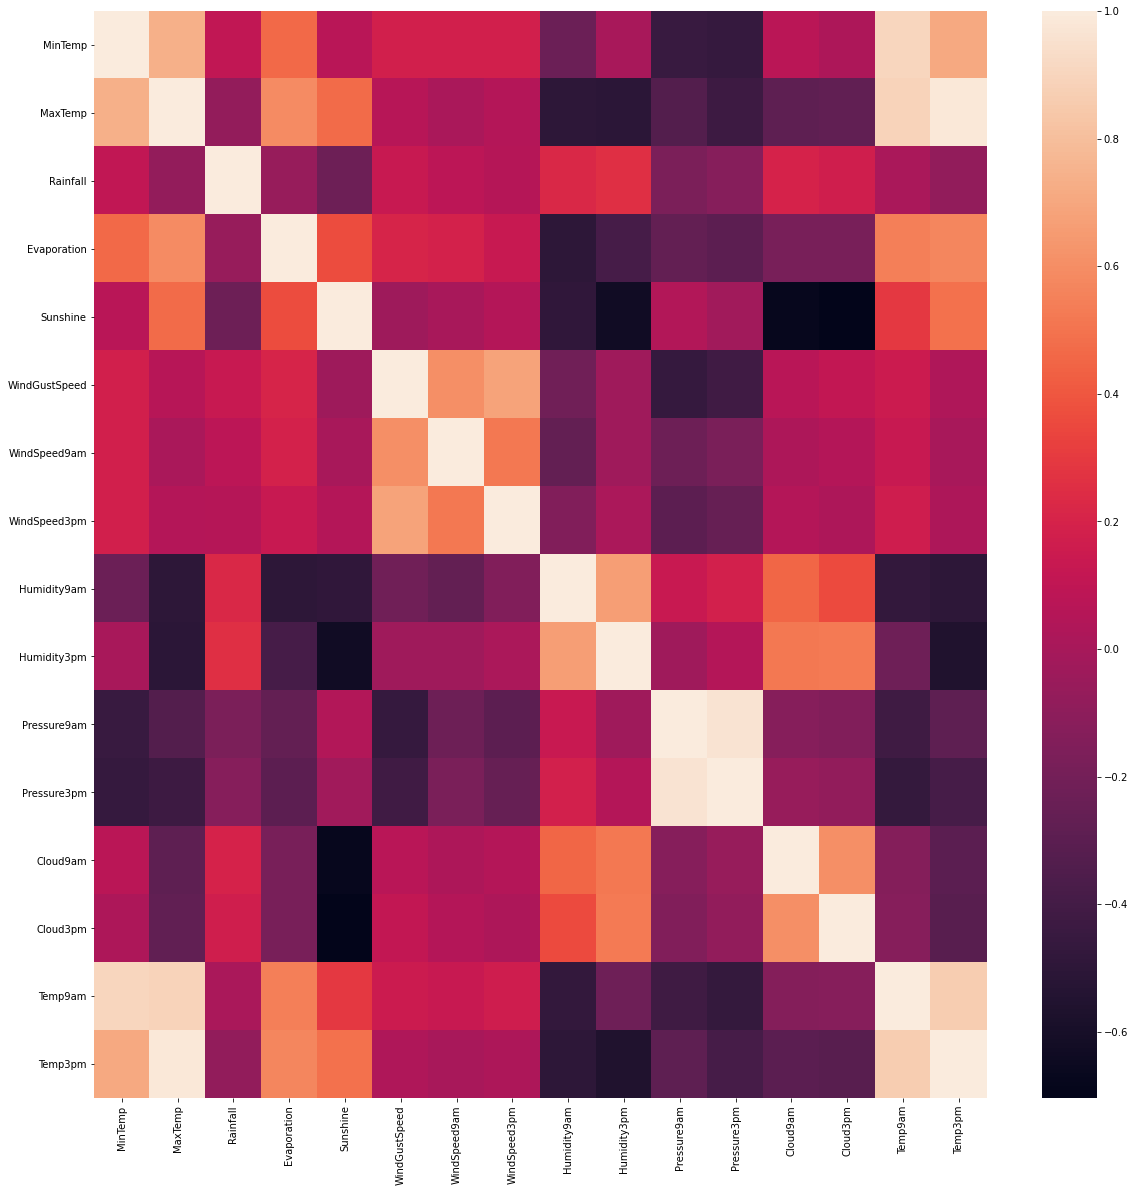

In [8]:
# Visualizations of data set by using heatmap

plt.figure(figsize=(20,20))
sns.heatmap(df.corr())
plt.show()

#### RainTomorrow Column: explore the number of raining days 

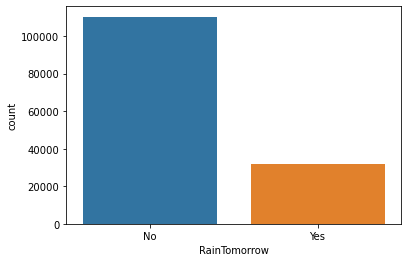

In [9]:
# Visulization of numbers of raining days and numbers of not raining days

plot_sns= sns.countplot(df["RainTomorrow"], label='Total')

In [10]:
# Numbers of raining days in the next day
# Numbers of not raining days in the next day

Rain, NotRain = df["RainTomorrow"].value_counts()
print('Rain: ',Rain)
print('Not Rain : ',NotRain)

Rain:  110316
Not Rain :  31877


#### How many cities in Australia and how many days are?

In [11]:
# Number of cities
# Number of days

print("Number of cities in the Australia:", len(df["Location"].unique()))
print("Number of days:", len(df["Date"].unique()))

Number of cities in the Australia: 49
Number of days: 3436


#### What is the earliest date and the latest date in the data set?

In [12]:
# The earliest date and the latest date:

print("The ealiest date is : ", df["Date"].min())
print("The latest date is : ", df["Date"].max())

The ealiest date is :  2007-11-01
The latest date is :  2017-06-25


#### Explore RainToday columns 

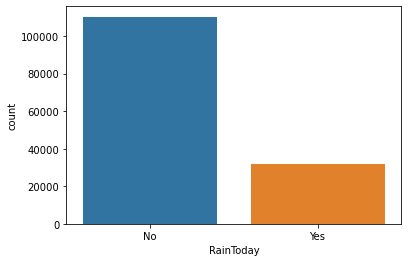

In [13]:
# Visulization of numbers of raining days and numbers of not raining days

plot_sns= sns.countplot(df["RainToday"], label='Total')

In [14]:
# Numbers of raining today
# Numbers of not raining today

Rain_to, NotRain_to = df["RainToday"].value_counts()
print('Rain: ',Rain_to)
print('Not Rain : ',NotRain_to)

Rain:  110319
Not Rain :  31880


#### Preprocessing the data set 

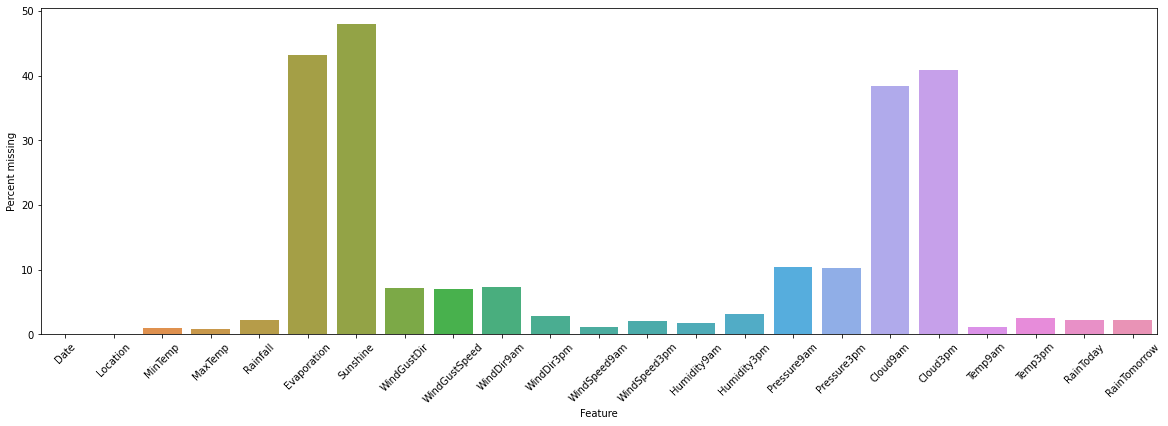

In [15]:
''' Deal with missing values. First, calculate the percentage of
missing values for every column, and plot them as a bar chart'''

null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (20,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [16]:
# Drop the columns that contains too many null values

df.drop('Evaporation', axis=1)
df.drop('Sunshine', axis=1)
df.drop('Cloud9am', axis=1)
df.drop('Cloud3pm', axis=1)

print(df.shape)
df.head(3)

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [17]:
'''Define impute functions. Impute categorical NaNs with -1, 
where we add 1 to make it 0. For each 
continuous variables, we impute missing values with median values of that
column, and for every variable
where any rows were imputed, add a separate 'imputed or not' column'''

def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [18]:
# Define a function to convert object types and string types to category type

def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [19]:
# Cast object type to category type

df2 = str_to_cat(df)
print(df2.shape)
df2.head(3)

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [20]:
# Filled the null values with mean using function

df3,my_table = mydf_preprocessor(df2,null_table = None)
print(df3.shape)
df3.head(3)

(145460, 39)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am_na,WindSpeed3pm_na,Humidity9am_na,Humidity3pm_na,Pressure9am_na,Pressure3pm_na,Cloud9am_na,Cloud3pm_na,Temp9am_na,Temp3pm_na
0,397,3,13.4,22.9,0.6,4.8,8.4,14,44.0,14,...,False,False,False,False,False,False,False,True,False,False
1,398,3,7.4,25.1,0.0,4.8,8.4,15,44.0,7,...,False,False,False,False,False,False,True,True,False,False
2,399,3,12.9,25.7,0.0,4.8,8.4,16,46.0,14,...,False,False,False,False,False,False,True,False,False,False


### 2. Using Random Forest to predict the weather for tomorrow 

#### 2.1 Define X and Y for the Random Forest Model

As we stated before, RainTomorrow is our target to predict, so Y is RainTomorrow column. The rest of columns are our X.

In [21]:
# Define X, Y

x= df3.drop('RainTomorrow', axis=1)
y= df3['RainTomorrow']

In [22]:
# Get train and test dataset using train_test_split

x_trn, x_val, y_trn, y_val = train_test_split(x, y, random_state=1)
print(x_trn.shape,x_val.shape,y_trn.shape,y_val.shape)

(109095, 38) (36365, 38) (109095,) (36365,)


#### 2.2 Using Random Forest Model to predict weather tomorrrow

In [23]:
# Using random forest model to predict 

model= RandomForestClassifier(n_jobs=4, verbose=True, n_estimators=200, max_depth=10, criterion='gini', )

model.fit(x_trn, y_trn)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   13.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   13.9s finished


RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=4, verbose=True)

In [24]:
# We have accuracy score above 0.84 , which is very high

y_prd = model.predict(x_val)
accuracy_randomForest=accuracy_score(y_val,y_prd)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.3s finished


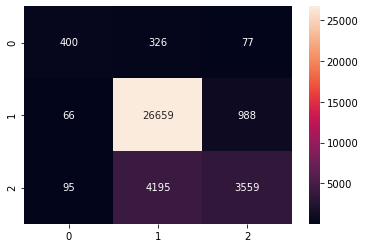

In [25]:
'''Using confusion_matrix to show that how many of not raining are predicted as raining and others, and how many of raining
    are predicted as not raining and others. 
    Keep in mind that 0 means not raining, 1 means raining and 2 means others '''

conf_matrix = confusion_matrix(y_val, y_prd)
sns.heatmap(conf_matrix, annot=True, fmt="d")



In [26]:
# Record accuracy in a dataframe

result_df=pd.DataFrame(data=[["RandomForest",accuracy_randomForest, None]],
                      columns=["Models", "Accuracy score", "Area under ROC curves"])
result_df

,Models,Accuracy score,Area under ROC curves
0,RandomForest,0.841963,None


### 3. Using K-nearest neighbor to predict weather tomorrow

In [27]:
# Build the knn model with KNeighborsClassifier
# Using the x_trn, y_trn from the Random Forest section

for K in range (1,10): 
    model_knn = KNeighborsClassifier(n_neighbors=K, weights = 'distance')
    model_knn.fit(x_trn, y_trn)

In [28]:
# Calculate the accuray score of KNN
# Accuracy is above 0.84
# However, KNN does not improve the accuracy of predicting weather tomorrow

num_neighs = -1
accuracy_list = 0.0
list_acc = []
list_nei = []

y_prd1 = model_knn.predict(x_val) #  predict
accuracy = accuracy_score(y_val, y_prd) # count accuracy score
list_acc.append(accuracy)
list_nei.append(K)
if accuracy > accuracy_list:
    num_neighs = K
    accuracy_list = accuracy
print("num_neighs = ",num_neighs)
print("accuracy_list = ",accuracy_list)


num_neighs =  9
accuracy_list =  0.8419634263715111


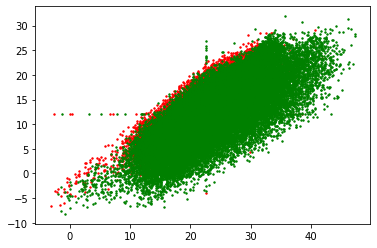

In [29]:
# Visualization
Maxtemp = x_val[['MaxTemp']].values # Set maxtemp and mintemp as x and y
Mintemp = x_val[['MinTemp']].values

c1_0, c1_1 = [], []
c2_0, c2_1 = [], []
for i in range(len(y_prd)):
    if y_prd[i] == 1: 
        c1_1.append(Maxtemp[i])
        c2_1.append(Mintemp[i])
    else:
        c1_0.append(Maxtemp[i])
        c2_0.append(Mintemp[i])

plt.figure()
plt.scatter(c1_0, c2_0, s=2, c='r')
plt.scatter(c1_1, c2_1, s=2, c='g')
plt.show()


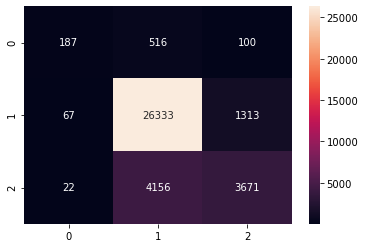

In [30]:
'''Using confusion_matrix to show that how many of not raining are predicted as raining and others, and how many of raining
    are predicted as not raining and others. 
    Keep in mind that 0 means not raining, 1 means raining and 2 means others '''

'''Although the accuracy scores of the KNN model and Random Forest Model are almost the same.
If we look at the confusion matrix, we can tell that Random Forest Model is more accurate in prediction.
RandomForest Model has more 1(Raining days) that has to be 1(Raining day) than that of KNN Model. 
So, if we want to know which day we have to cary an umbralla or a raincoat when we are outside, we need to use RandomForest Model.
'''

conf_matrix1 = confusion_matrix(y_val, y_prd1)
sns.heatmap(conf_matrix1, annot=True, fmt="d")


In [31]:
# Store accuracy score into a dataframe

result_df2=pd.DataFrame(data=[["KNN", accuracy_list, None]],
                       columns=["Models", "Accuracy score", "Area under ROC curves"])
result_df=result_df.append(result_df2,ignore_index=True)
result_df

,Models,Accuracy score,Area under ROC curves
0,RandomForest,0.841963,None
1,KNN,0.841963,None


### 4. Using Deep Neural Network to predict the weather for tomorrow

We used Random Forest and KNN, both of them can predict weather tomorrow for 83% to 84% correctness. 
However, we want the prediction of weather tomorrow be more accurate. 
Thus, we shall use Deep Neural Network to predict weather tomorrow.

#### 4.1 Re-process the train and test dataset

As we stated before, RainTomorrow is our target to predict, so Y is RainTomorrow column. The rest of columns are our X.

In [32]:
# Separate out X and Y

X = df3.iloc[:, :38]
Y = df3.iloc[:, 38:39]

In [33]:
# Covert X, Y into formats that Tesorflow can take it

X=np.asarray(X).astype(np.float32) 
Y=np.asarray(Y).astype(np.float32)

In [34]:
# Use Train-Test Split to split the data set into train and test data set

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.33, random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(97458, 38) (48002, 38) (97458, 1) (48002, 1)


#### 4.2 DNN model without dropout

In [35]:
# Build the deep neural network
Model = Sequential()
Model.add(Dense(40, input_dim=38, kernel_initializer='uniform', activation='relu'))
Model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
Model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
Model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
Model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
Model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
Model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
Model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [36]:
# Compile the DNN

Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the DNN with train data with epochs be 90 and batch_size be 1000

Model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=90, batch_size=1000)

Epoch 1/90
98/98 [==============================] - 1s 6ms/step - loss: 0.3570 - accuracy: 0.9752 - val_loss: 0.1257 - val_accuracy: 0.9751
Epoch 2/90
98/98 [==============================] - 0s 3ms/step - loss: 0.1149 - accuracy: 0.9752 - val_loss: 0.1083 - val_accuracy: 0.9751
Epoch 3/90
98/98 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9752 - val_loss: 0.1054 - val_accuracy: 0.9751
Epoch 4/90
98/98 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.9752 - val_loss: 0.1028 - val_accuracy: 0.9751
Epoch 5/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1017 - accuracy: 0.9752 - val_loss: 0.0997 - val_accuracy: 0.9751
Epoch 6/90
98/98 [==============================] - 0s 5ms/step - loss: 0.0960 - accuracy: 0.9752 - val_loss: 0.0905 - val_accuracy: 0.9751
Epoch 7/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9752 - val_loss: 0.0695 - val_accuracy: 0.9751
Epoch 8/90
98/98 [==

98/98 [==============================] - 0s 4ms/step - loss: 0.0519 - accuracy: 0.9817 - val_loss: 0.0512 - val_accuracy: 0.9773
Epoch 60/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0111 - val_accuracy: 0.9951
Epoch 61/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0022 - val_accuracy: 0.9994
Epoch 62/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0021 - val_accuracy: 0.9993
Epoch 63/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0016 - val_accuracy: 0.9994
Epoch 64/90
98/98 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0022 - val_accuracy: 0.9993
Epoch 65/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0019 - val_accuracy: 0.9991
Epoch 66/90
98/98 [======

In [37]:
# Evaluate the model and we have accuracy be 99.95%%
scores = Model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

1501/1501 [==============================] - 1s 677us/step - loss: 0.0855 - accuracy: 0.9751
Accuracy: 97.51%


#### Analysis DNN without dropout layer by using ROC curve

In [38]:
# Make a prediction of X_test
Y_pred= Model.predict(X_test)


#Report results using nice ROC curves, report AUC values.
rec_tr1, fall_out_tr1, thresholds_tr1 = roc_curve(Y_test,Y_pred)

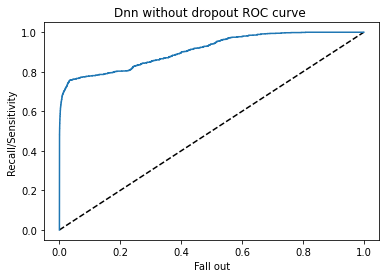

In [39]:
#Report results using nice ROC curves, report AUC values.


plt.plot([0,1],[0,1],'k--')
plt.plot(rec_tr1,fall_out_tr1, label='DNN')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('Dnn without dropout ROC curve ')
plt.show()

In [40]:
#Report results using nice ROC curves, report AUC values.
#Area under ROC curve

Model_area=roc_auc_score(Y_test,Y_pred)
print(Model_area)

0.9098128188655922


In [41]:
# Store the accuracy score and area under ROC curves into a dataframe


result_df3=pd.DataFrame(data=[['Dnn without dropout', scores[1] ,Model_area]],
                      columns=["Models", "Accuracy score", "Area under ROC curves"])
result_df=result_df.append(result_df3,ignore_index=True )
result_df

,Models,Accuracy score,Area under ROC curves
0,RandomForest,0.841963,None
1,KNN,0.841963,None
2,Dnn without dropout,0.975126,0.909813


#### 4.3 Build and compile a deep learning model with input layer dropout

In [42]:
# Build the deep neural network with dropout of 0.2. i.e. dropping out at random 20% of 
#input features

Model2 = Sequential()
Model2.add(Dropout(0.2, input_shape=(38,)))
Model2.add(Dense(40, input_dim=38, kernel_initializer='uniform', activation='relu'))
Model2.add(Dense(30, kernel_initializer='uniform', activation='relu'))
Model2.add(Dense(30, kernel_initializer='uniform', activation='relu'))
Model2.add(Dense(20, kernel_initializer='uniform', activation='relu'))
Model2.add(Dense(20, kernel_initializer='uniform', activation='relu'))
Model2.add(Dense(10, kernel_initializer='uniform', activation='relu'))
Model2.add(Dense(6, kernel_initializer='uniform', activation='relu'))
Model2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the DNN

Model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the DNN with train data

Model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=90, batch_size=1000)

Epoch 1/90
98/98 [==============================] - 0s 5ms/step - loss: 0.3602 - accuracy: 0.9752 - val_loss: 0.1204 - val_accuracy: 0.9751
Epoch 2/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1173 - accuracy: 0.9752 - val_loss: 0.1128 - val_accuracy: 0.9751
Epoch 3/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1112 - accuracy: 0.9752 - val_loss: 0.1078 - val_accuracy: 0.9751
Epoch 4/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1084 - accuracy: 0.9752 - val_loss: 0.1032 - val_accuracy: 0.9751
Epoch 5/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9752 - val_loss: 0.1000 - val_accuracy: 0.9751
Epoch 6/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0966 - accuracy: 0.9752 - val_loss: 0.0806 - val_accuracy: 0.9751
Epoch 7/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0833 - accuracy: 0.9752 - val_loss: 0.0680 - val_accuracy: 0.9751
Epoch 8/90
98/98 [==

98/98 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9949 - val_loss: 0.0117 - val_accuracy: 0.9985
Epoch 60/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9951 - val_loss: 0.0121 - val_accuracy: 0.9985
Epoch 61/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9953 - val_loss: 0.0076 - val_accuracy: 0.9990
Epoch 62/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9955 - val_loss: 0.0190 - val_accuracy: 0.9964
Epoch 63/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0187 - accuracy: 0.9951 - val_loss: 0.0074 - val_accuracy: 0.9991
Epoch 64/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9950 - val_loss: 0.0073 - val_accuracy: 0.9991
Epoch 65/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0187 - accuracy: 0.9952 - val_loss: 0.0090 - val_accuracy: 0.9970
Epoch 66/90
98/98 [======

In [43]:
# Evaluate the model with input layer dropout and the accuracy score drop 
scores2 = Model2.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores2[1]*100))

1501/1501 [==============================] - 1s 658us/step - loss: 0.0125 - accuracy: 0.9970
Accuracy: 99.70%


#### Analysis DNN with input layer dropout by using ROC curve

In [44]:
# Make a prediction of X_test
Y_pred2= Model2.predict(X_test)


#Report results using nice ROC curves, report AUC values.
rec_tr2, fall_out_tr2, thresholds_tr2 = roc_curve(Y_test,Y_pred2)

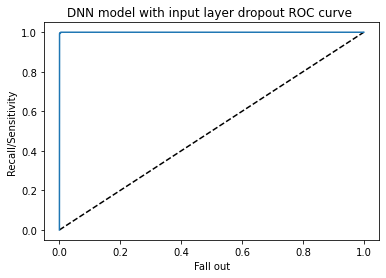

In [45]:
#Report results using nice ROC curves, report AUC values.


plt.plot([0,1],[0,1],'k--')
plt.plot(rec_tr2,fall_out_tr2, label='DNN')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('DNN model with input layer dropout ROC curve ')
plt.show()

In [46]:
#Report results using nice ROC curves, report AUC values.
#Area under ROC curve

Model_area2=roc_auc_score(Y_test,Y_pred2)
print(Model_area2)

0.9999254322229274


In [47]:
# Store the accuracy score and area under ROC curves into a dataframe

result_df4=pd.DataFrame(data=[['DNN model with input layer dropout ',scores2[1], Model_area2]],
                      columns=['Models',"Accuracy score",'Area under ROC curves'])
result_df = result_df.append(result_df4, ignore_index=True)
result_df

,Models,Accuracy score,Area under ROC curves
0,RandomForest,0.841963,None
1,KNN,0.841963,None
2,Dnn without dropout,0.975126,0.909813
3,DNN model with input layer dropout,0.997042,0.999925


#### 4.4 Build and compile a deep learning model with hidden layer dropout

In [48]:
# Build the deep neural network with dropout of 0.2. i.e. dropping out at random 20% of 
#in an input layer

Model3 = Sequential()
Model3.add(Dense(40, input_dim=38, kernel_initializer='uniform', activation='relu'))
Model3.add(Dense(30, kernel_initializer='uniform', activation='relu'))
Model3.add(Dense(30, kernel_initializer='uniform', activation='relu'))
Model3.add(Dense(20, kernel_initializer='uniform', activation='relu'))
Model3.add(Dense(20, kernel_initializer='uniform', activation='relu'))
Model3.add(Dense(10, kernel_initializer='uniform', activation='relu'))
Model3.add(Dense(6, kernel_initializer='uniform', activation='relu'))
Model3.add(Dropout(0.2))
Model3.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the DNN

Model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the DNN with train data

Model3.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=90, batch_size=1000)

Epoch 1/90
98/98 [==============================] - 0s 5ms/step - loss: 0.3492 - accuracy: 0.9736 - val_loss: 0.1287 - val_accuracy: 0.9751
Epoch 2/90
98/98 [==============================] - 0s 3ms/step - loss: 0.1269 - accuracy: 0.9752 - val_loss: 0.1091 - val_accuracy: 0.9751
Epoch 3/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1152 - accuracy: 0.9752 - val_loss: 0.1059 - val_accuracy: 0.9751
Epoch 4/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.9752 - val_loss: 0.1023 - val_accuracy: 0.9751
Epoch 5/90
98/98 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9752 - val_loss: 0.0959 - val_accuracy: 0.9751
Epoch 6/90
98/98 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.9752 - val_loss: 0.0752 - val_accuracy: 0.9751
Epoch 7/90
98/98 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.9752 - val_loss: 0.0624 - val_accuracy: 0.9751
Epoch 8/90
98/98 [==

98/98 [==============================] - 0s 4ms/step - loss: 0.0092 - accuracy: 0.9986 - val_loss: 0.0126 - val_accuracy: 0.9973
Epoch 60/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9986 - val_loss: 0.0072 - val_accuracy: 0.9994
Epoch 61/90
98/98 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9986 - val_loss: 0.0072 - val_accuracy: 0.9994
Epoch 62/90
98/98 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9985 - val_loss: 0.0070 - val_accuracy: 0.9996
Epoch 63/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9981 - val_loss: 0.0080 - val_accuracy: 0.9986
Epoch 64/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9986 - val_loss: 0.0072 - val_accuracy: 0.9990
Epoch 65/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9986 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 66/90
98/98 [======

In [49]:
# Evaluate the model with hidden input layer dropout.
# Even the accuracy is still very high, it still less than the DNN model without dropout

scores3 = Model3.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores3[1]*100))

1501/1501 [==============================] - 1s 662us/step - loss: 0.0042 - accuracy: 0.9996
Accuracy: 99.96%


#### Analysis DNN with hidden input layer  dropout

In [50]:
# Make a prediction of X_test
Y_pred3= Model3.predict(X_test)


#Report results using nice ROC curves, report AUC values.
rec_tr3, fall_out_tr3, thresholds_tr3 = roc_curve(Y_test,Y_pred3)

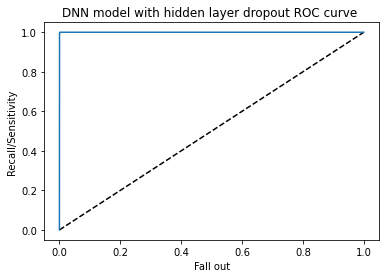

In [51]:
#Report results using nice ROC curves, report AUC values.


plt.plot([0,1],[0,1],'k--')
plt.plot(rec_tr3,fall_out_tr3, label='DNN')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('DNN model with hidden layer dropout ROC curve ')
plt.show()

In [52]:
#Report results using nice ROC curves, report AUC values.
#Area under ROC curve

Model_area3=roc_auc_score(Y_test,Y_pred3)
print(Model_area3)

0.9999820536339763


In [53]:
result_df4=pd.DataFrame(data=[['DNN model with hidden layer dropout ',scores3[1],Model_area3]],
                      columns=['Models',"Accuracy score",'Area under ROC curves'])
result_df = result_df.append(result_df4, ignore_index=True)
result_df

,Models,Accuracy score,Area under ROC curves
0,RandomForest,0.841963,None
1,KNN,0.841963,None
2,Dnn without dropout,0.975126,0.909813
3,DNN model with input layer dropout,0.997042,0.999925
4,DNN model with hidden layer dropout,0.999646,0.999982


#### 4.5 Build and compile a deep learning model with hidden layer dropout with weight constraint 

In [54]:
# Build the deep neural network with dropout of 0.2. i.e. dropping out at random 20% of 
#in an input layer

Model4 = Sequential()
Model4.add(Dense(40, input_dim=38, kernel_initializer='uniform', activation='relu'))
Model4.add(Dense(30, kernel_initializer='uniform', activation='relu'))
Model4.add(Dense(30, kernel_initializer='uniform', activation='relu'))
Model4.add(Dense(20, kernel_initializer='uniform', activation='relu'))
Model4.add(Dense(20, kernel_initializer='uniform', activation='relu'))
Model4.add(Dense(10, kernel_initializer='uniform', activation='relu'))
Model4.add(Dense(6, kernel_initializer='uniform', activation='relu'))
Model4.add(Dropout(0.2))
Model4.add(Dense(1, kernel_initializer='uniform', activation='sigmoid',kernel_constraint=maxnorm(3)))

# Compile the DNN

Model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the DNN with train data

Model4.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=90, batch_size=1000)

Epoch 1/90
98/98 [==============================] - 0s 5ms/step - loss: 0.3756 - accuracy: 0.9669 - val_loss: 0.1270 - val_accuracy: 0.9751
Epoch 2/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1544 - accuracy: 0.9752 - val_loss: 0.1080 - val_accuracy: 0.9751
Epoch 3/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1429 - accuracy: 0.9752 - val_loss: 0.1064 - val_accuracy: 0.9751
Epoch 4/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1402 - accuracy: 0.9752 - val_loss: 0.1037 - val_accuracy: 0.9751
Epoch 5/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1361 - accuracy: 0.9752 - val_loss: 0.1057 - val_accuracy: 0.9751
Epoch 6/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1279 - accuracy: 0.9752 - val_loss: 0.0878 - val_accuracy: 0.9751
Epoch 7/90
98/98 [==============================] - 0s 4ms/step - loss: 0.1098 - accuracy: 0.9752 - val_loss: 0.0682 - val_accuracy: 0.9751
Epoch 8/90
98/98 [==

98/98 [==============================] - 0s 4ms/step - loss: 0.0445 - accuracy: 0.9752 - val_loss: 0.0254 - val_accuracy: 0.9751
Epoch 60/90
98/98 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9752 - val_loss: 0.0254 - val_accuracy: 0.9751
Epoch 61/90
98/98 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9752 - val_loss: 0.0265 - val_accuracy: 0.9751
Epoch 62/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0443 - accuracy: 0.9752 - val_loss: 0.0261 - val_accuracy: 0.9751
Epoch 63/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9752 - val_loss: 0.0262 - val_accuracy: 0.9751
Epoch 64/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9752 - val_loss: 0.0256 - val_accuracy: 0.9751
Epoch 65/90
98/98 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 0.9752 - val_loss: 0.0261 - val_accuracy: 0.9751
Epoch 66/90
98/98 [======

In [55]:
# Evaluate the model with hidden layer dropout with weight constraint,
# accuracy score is less the DNN model without dropout


scores4 = Model4.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores4[1]*100))

1501/1501 [==============================] - 1s 672us/step - loss: 0.0264 - accuracy: 0.9751
Accuracy: 97.51%


#### Analysis DNN with hidden layer dropout and weight constraint by using ROC curve

In [56]:
# Make a prediction of X_test
Y_pred4= Model4.predict(X_test)


#Report results using nice ROC curves, report AUC values.
rec_tr4, fall_out_tr4, thresholds_tr3 = roc_curve(Y_test,Y_pred4)

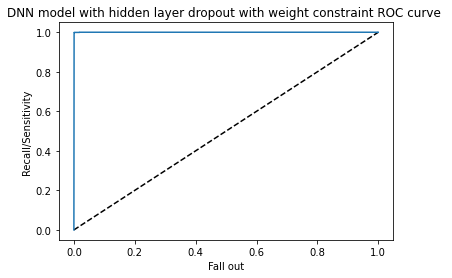

In [57]:
#Report results using nice ROC curves, report AUC values.


plt.plot([0,1],[0,1],'k--')
plt.plot(rec_tr4,fall_out_tr4, label='DNN')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('DNN model with hidden layer dropout with weight constraint ROC curve ')
plt.show()

In [58]:
#Report results using nice ROC curves, report AUC values.
#Area under ROC curve

Model_area4=roc_auc_score(Y_test,Y_pred4)
print(Model_area4)

0.9997776475667233


In [59]:
result_df5=pd.DataFrame(data=[['DNN model with hidden layer dropout with weight constraint ',scores4[1],Model_area4]],
                      columns=['Models',"Accuracy score",'Area under ROC curves'])
result_df = result_df.append(result_df5, ignore_index=True)
result_df

,Models,Accuracy score,Area under ROC curves
0,RandomForest,0.841963,None
1,KNN,0.841963,None
2,Dnn without dropout,0.975126,0.909813
3,DNN model with input layer dropout,0.997042,0.999925
4,DNN model with hidden layer dropout,0.999646,0.999982
5,DNN model with hidden layer dropout with weigh...,0.975126,0.999778


#### 4.6 Analysis of DNN models by Area under ROC curve

In [60]:
# Comparing the accuracy score of each model, we can see that DNN model gives the highest accuracy on prediction
# Dnn with hidden dropout layer gives the highest accuracy on prediction of weather tomorrow
# Dnn with hidden dropout layer has the highest area under ROC curves 

result_df

,Models,Accuracy score,Area under ROC curves
0,RandomForest,0.841963,None
1,KNN,0.841963,None
2,Dnn without dropout,0.975126,0.909813
3,DNN model with input layer dropout,0.997042,0.999925
4,DNN model with hidden layer dropout,0.999646,0.999982
5,DNN model with hidden layer dropout with weigh...,0.975126,0.999778


In conclusion,DNN model with hidden layer dropout gives the highest accuracy in prediction of weather tomorrow. Then, we shall use it for prediction of weather in the next day.

### 5. Prediction

In [61]:
# Using DNN model with hidden layer dropout to make a prediction

Y_prediction = Model3.predict(X)
Y_prediction

array([[3.3099766e-08],
       [1.8223203e-12],
       [3.1619105e-15],
       ...,
       [1.4507523e-14],
       [4.8517247e-15],
       [1.9761209e-10]], dtype=float32)

In [64]:
# Cast our prediction of weather tomorrow to a DataFrame

Y_prediction_df=pd.DataFrame(Y_prediction, columns=['RainTomorrow'])
Y_prediction_df

,RainTomorrow
0,3.309977e-08
1,1.822320e-12
2,3.161910e-15
3,2.485066e-11
4,1.558577e-11
...,...
145455,4.180297e-14
145456,1.902880e-14
145457,1.450752e-14
145458,4.851725e-15


In [65]:
# Replace all numbers in the prediction to 'Yes' and 'No'

for x in Y_prediction_df['RainTomorrow']:
    if x<0.5:
        Y_prediction_df['RainTomorrow']=Y_prediction_df['RainTomorrow'].replace(x,"No")
    else:
        Y_prediction_df['RainTomorrow']=Y_prediction_df['RainTomorrow'].replace(x,"Yes")

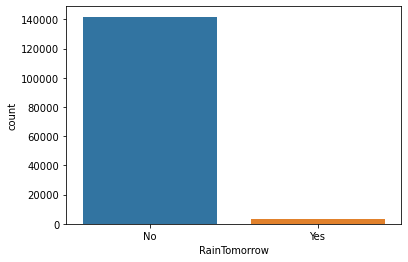

In [66]:
# Visulization of the prediction of weather tomorrow

sns.countplot(Y_prediction_df["RainTomorrow"], label='Total')

In [67]:
# Numbers of raining days in the next day
# Numbers of not raining days in the next day

Rain_pred, NotRain_pred = Y_prediction_df["RainTomorrow"].value_counts()
print('Rain: ',Rain_pred)
print('Not Rain : ',NotRain_pred)


Rain:  141843
Not Rain :  3617
